# Contrastive learning 

Contrastive learning is a powerful technique within self-supervised learning, particularly useful for tasks involving large amounts of unlabeled data, such as images.The primary goal in contrastive learning is to learn an encoder, $ 𝐸(𝑥) $, that maps input data $𝑥$ to a feature space where we can effectively distinguish between positive and negative samples.

**How its work**
Contrastive learning considers both similar and dissimilar samples, learning useful representations from them. The main idea is to **pull similar samples** closer together in the learned representation space and **push dissimilar ones farther apart**. In this approach, the model is trained to maximize the similarity between positive pairs and minimize the similarity between negative pairs. By optimizing this contrastive loss function, the model learns to discover meaningful features that are useful for distinguishing between different samples.

**Positive & Negative samples**
In self-supervised contrastive learning, since there are no class labels, positive and negative samples are generated from the reference image using various augmentation techniques. For example, if a picture of a dog is used as the reference sample, only the augmented versions of this image will form the positive samples. Consequently, other images of dogs will be part of the negative sample set.

![SSCL_SCL](../ContrastiveLearning/CL_Image/SelfSupervisedContrastiveLearning_SupervisedContrastiveLearning.jpg)

_The anchor_: is the data sample that you start with. It is the reference point for which you want to find similar (positive) or dissimilar (negative) samples.

_SCL_: supervised contrastive learning (Sample with label) as shown below

_SSCL_: self-supervised contrastive learning (sample without label)

Contrastive learning, also known as self-supervised learning (CL), is equivalent to SSL.

![SCL1](../ContrastiveLearning/CL_Image/ContrastiveSupervisedLearning1.jpg)

**Data generation**
- **Data augmentation:**
Data augmentation refers to the process of increasing the diversity of data by applying various transformations or modifications, such as rotations, flips, or noise addition, to the existing data, thereby generating additional data samples for training machine learning models.

![Data augmentation1](../ContrastiveLearning/CL_Image/Data_Augmentation.png)

- **Image patches**

Break image into **patches**. Use patches from the same image as **positive**, from others as **negative**.

![ImagePatch1](../ContrastiveLearning/CL_Image/ImagePatch.jpg)

## Cost function

**Triplet Loss function**

_Distance Constraints:_ Following equation states that the squared Euclidean distance between the anchor $ f(A) $ and the positive sample $ f(P) $ should be less than or equal to the squared Euclidean distance between the anchor $ f(A) $ and the negative sample $ f(N) $. In other words, the anchor should be closer to the positive sample than to the negative sample.

$$
| f(A) - f(P) |_2^2 \leq | f(A) - f(N) |_2^2
$$

***The function $ f $ is the encoder that converts data samples into feature representations in a latent space. We aim to find the encoder $ f $ that minimizes a loss function, such as the triplet loss.***

**Triplet Loss Function**:

$$
| f(A) - f(P) |_2^2 - | f(A) - f(N) |_2^2 \leq 0
$$

This can be rewritten as:

$$
| f(A) - f(P) |_2^2 - | f(A) - f(N) |_2^2 + \alpha \leq 0
$$

$ $alpha $ is a margin parameter that ensures a buffer between the distances of positive and negative pairs. The margin $ $alpha $ helps in maintaining a minimum distance between the anchor-negative pair and the anchor-positive pair. This margin can be adjusted based on the problem and dataset.

**Final Triplet Loss Function**:

$$
\text{Loss}(A, P, N) = \max(| f(A) - f(P) |_2^2 - | f(A) - f(N) |_2^2 + \alpha, 0)
$$

- **Loss**: This function computes the final loss for a triplet of anchor $ A $, positive $ P $, and negative $ N $. 
   - The term $ $| f(A) - f(P) $|_2^2 - $| f(A) - f(N) $|_2^2 + $alpha $ measures how much the positive distance is less than the negative distance plus a margin.
   - If this value is positive, it indicates that the distance between the anchor and the positive sample is not sufficiently smaller than the distance between the anchor and the negative sample. Thus, the loss is computed as this positive value. If it's zero or negative, the loss is zero, indicating that the constraints are satisfied.

## Continue with example

To derive the triplet loss function for a specific function $ f(x) = ax^2 + bx + c $, we'll follow these steps:

### 1. Define the Function and Loss

Let $ f(x) = ax^2 + bx + c $. We are using the triplet loss function which is defined as:

$$
\text{Loss}(A, P, N) = \max \left( \| f(x_A) - f(x_P) \|^2 - \| f(x_A) - f(x_N) \|^2 + \alpha, 0 \right)
$$

where $ x_A $ is the anchor sample, $ x_P $ is the positive sample, $ x_N $ is the negative sample, and $ \alpha $ is a margin.

### 2. Compute $ \| f(x_A) - f(x_P) \|^2 $ and $ \| f(x_A) - f(x_N) \|^2 $

Calculate the squared Euclidean distances for the pairs $ (A, P) $ and $ (A, N) $:

#### Distance between Anchor and Positive

$$
f(x_A) = ax_A^2 + bx_A + c
$$
$$
f(x_P) = ax_P^2 + bx_P + c
$$
$$
\| f(x_A) - f(x_P) \|^2 = \left( (ax_A^2 + bx_A + c) - (ax_P^2 + bx_P + c) \right)^2
$$
$$
\| f(x_A) - f(x_P) \|^2 = \left( a(x_A^2 - x_P^2) + b(x_A - x_P) \right)^2
$$

#### Distance between Anchor and Negative

$$
f(x_N) = ax_N^2 + bx_N + c
$$
$$
\| f(x_A) - f(x_N) \|^2 = \left( (ax_A^2 + bx_A + c) - (ax_N^2 + bx_N + c) \right)^2
$$
$$
\| f(x_A) - f(x_N) \|^2 = \left( a(x_A^2 - x_N^2) + b(x_A - x_N) \right)^2
$$

### 3. Expand the Squared Distances

#### Expand $ \| f(x_A) - f(x_P) \|^2 $:

$$
\| f(x_A) - f(x_P) \|^2 = \left( a(x_A^2 - x_P^2) + b(x_A - x_P) \right)^2
$$
$$
= a^2 (x_A^2 - x_P^2)^2 + 2ab (x_A^2 - x_P^2)(x_A - x_P) + b^2 (x_A - x_P)^2
$$

#### Expand $ \| f(x_A) - f(x_N) \|^2 $:

$$
\| f(x_A) - f(x_N) \|^2 = \left( a(x_A^2 - x_N^2) + b(x_A - x_N) \right)^2
$$
$$
= a^2 (x_A^2 - x_N^2)^2 + 2ab (x_A^2 - x_N^2)(x_A - x_N) + b^2 (x_A - x_N)^2
$$

### 4. Compute the Triplet Loss

Substitute the expanded forms into the loss function:

$$
\text{Loss}(A, P, N) = \max \left( \| f(x_A) - f(x_P) \|^2 - \| f(x_A) - f(x_N) \|^2 + \alpha, 0 \right)
$$

$$
\text{Loss}(A, P, N) = \max \left( \left[ a^2 (x_A^2 - x_P^2)^2 + 2ab (x_A^2 - x_P^2)(x_A - x_P) + b^2 (x_A - x_P)^2 \right] - \left[ a^2 (x_A^2 - x_N^2)^2 + 2ab (x_A^2 - x_N^2)(x_A - x_N) + b^2 (x_A - x_N)^2 \right] + \alpha, 0 \right)
$$

### 5. Simplify the Triplet Loss Function

Subtract the two terms:

$$
\text{Loss}(A, P, N) = \max \left( a^2 \left[ (x_A^2 - x_P^2)^2 - (x_A^2 - x_N^2)^2 \right] + 2ab \left[ (x_A^2 - x_P^2)(x_A - x_P) - (x_A^2 - x_N^2)(x_A - x_N) \right] + b^2 \left[ (x_A - x_P)^2 - (x_A - x_N)^2 \right] + \alpha, 0 \right)
$$

### 6. Derivatives with Respect to $ a $, $ b $, and $ c $

#### Derivative with Respect to $ a $:

$$
\frac{\partial \text{Loss}}{\partial a} = 2a \left[ (x_A^2 - x_P^2)^2 - (x_A^2 - x_N^2)^2 \right] + 2 \left[ (x_A^2 - x_P^2)(x_A - x_P) - (x_A^2 - x_N^2)(x_A - x_N) \right]
$$

#### Derivative with Respect to $ b $:

$$
\frac{\partial \text{Loss}}{\partial b} = 2b \left[ (x_A - x_P)^2 - (x_A - x_N)^2 \right] + 2a \left[ (x_A^2 - x_P^2)(x_A - x_P) - (x_A^2 - x_N^2)(x_A - x_N) \right]
$$

#### Derivative with Respect to $ c $:

Since $ c $ does not affect the difference $ \| f(x_A) - f(x_P) \|^2 - \| f(x_A) - f(x_N) \|^2 $, the derivative with respect to $ c $ is zero:

$$
\frac{\partial \text{Loss}}{\partial c} = 0
$$


In [1]:
import numpy as np
from sympy import symbols, Eq, solve

# Define variables
a, b = symbols('a b')

# Given values
x_A = 0.1
x_P = 1
x_N = 2

# Derivative with respect to a
expr_a = 2*a * ((x_N**2 - x_P**2) * (2*x_A**2 - (x_P**2 + x_N**2))) + 2 * (x_A - x_P) * (-x_P**2 + x_N**2)

# Derivative with respect to b
expr_b = 2*b * (x_N - x_P) * (2*x_A - (x_P + x_N)) + 2*a * (x_A - x_P) * (-x_P**2 + x_N**2)

# Set derivatives to zero
eq1 = Eq(expr_a, 0)
eq2 = Eq(expr_b, 0)

# Solve the equations
solution = solve((eq1, eq2), (a, b))

# Print the results
print("Solution for a and b:")
print(f"a = {solution[a]}")
print(f"b = {solution[b]}")


Solution for a and b:
a = -0.180722891566265
b = 0.174268502581756


### Representing Function with Optimal $a$ and $b$

To better understand the optimization process, I have plotted the function using the optimal values of $a$ and $b$. To illustrate how changing the $b$ value affects the comparison between the anchor (reference) point and the positive and negative samples, I adjusted the $b$ value. This adjustment helps to visualize the differences more clearly and shows how varying $b$ impacts the anchor's relationship with positive and negative samples. For a more intuitive comparison, it is often useful to change $b$ based on heuristic methods.

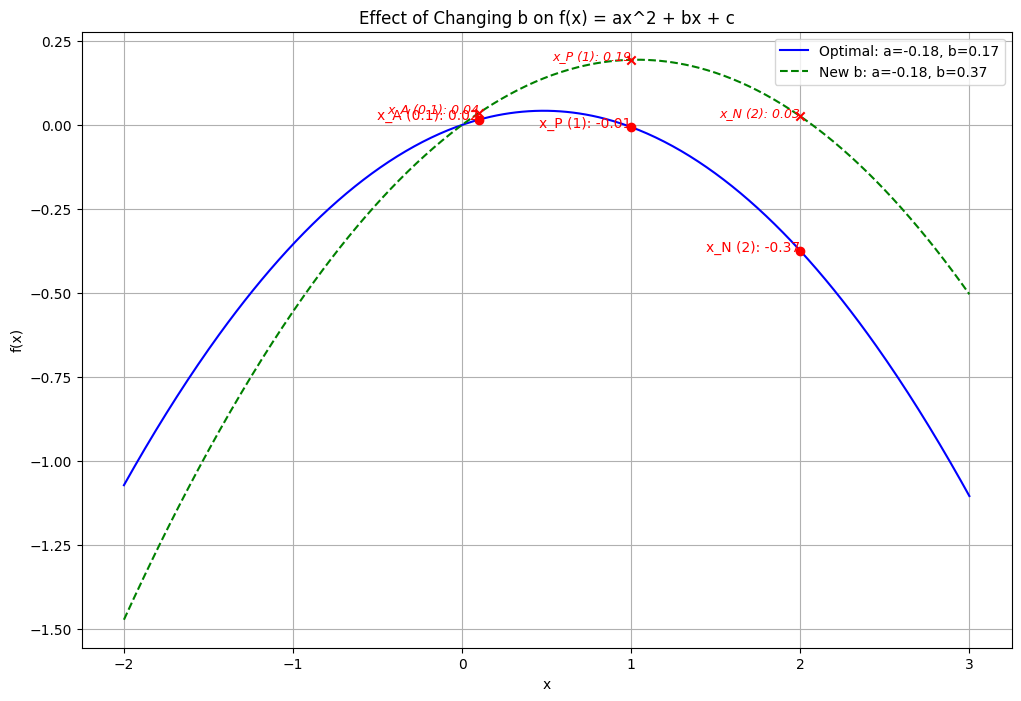

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

# Define variables
a, b = symbols('a b')

# Given values
x_A = 0.1
x_P = 1
x_N = 2

# Derivative expressions
expr_a = 2*a * ((x_N**2 - x_P**2) * (2*x_A**2 - (x_P**2 + x_N**2))) + 2 * (x_A - x_P) * (-x_P**2 + x_N**2)
expr_b = 2*b * (x_N - x_P) * (2*x_A - (x_P + x_N)) + 2*a * (x_A - x_P) * (-x_P**2 + x_N**2)

# Solve for optimal a and b
opt_eq1 = Eq(expr_a, 0)
opt_eq2 = Eq(expr_b, 0)

# Solve for a and b
optimal_solution = solve((opt_eq1, opt_eq2), (a, b))

# Extract the optimal values for a and b
a_opt = optimal_solution[a]
b_opt = optimal_solution[b]

# Define a function for f(x) = ax^2 + bx + c
def f(x, a_value, b_value, c_value=0):
    return a_value * x**2 + b_value * x + c_value

# Define target b value
b_target = b_opt + 0.2

# Compute the function values with the optimal a and the target b
x_vals = np.linspace(-2, 3, 400)
y_opt = f(x_vals, a_opt, b_opt)
y_target = f(x_vals, a_opt, b_target)

# Compute function values at x_A, x_P, x_N
y_A_opt = f(x_A, a_opt, b_opt)
y_P_opt = f(x_P, a_opt, b_opt)
y_N_opt = f(x_N, a_opt, b_opt)

y_A_target = f(x_A, a_opt, b_target)
y_P_target = f(x_P, a_opt, b_target)
y_N_target = f(x_N, a_opt, b_target)

# Plotting
plt.figure(figsize=(12, 8))

# Plot for optimal b
plt.plot(x_vals, y_opt, label=f'Optimal: a={a_opt:.2f}, b={b_opt:.2f}', color='blue')

# Plot for target b
plt.plot(x_vals, y_target, label=f'New b: a={a_opt:.2f}, b={b_target:.2f}', color='green', linestyle='--')

# Marking points on the plot for optimal b
plt.scatter([x_A, x_P, x_N], [y_A_opt, y_P_opt, y_N_opt], color='red', zorder=5)
plt.text(x_A, y_A_opt, f'x_A ({x_A}): {y_A_opt:.2f}', horizontalalignment='right', color='red')
plt.text(x_P, y_P_opt, f'x_P ({x_P}): {y_P_opt:.2f}', horizontalalignment='right', color='red')
plt.text(x_N, y_N_opt, f'x_N ({x_N}): {y_N_opt:.2f}', horizontalalignment='right', color='red')

# Marking points on the plot for target b
plt.scatter([x_A, x_P, x_N], [y_A_target, y_P_target, y_N_target], color='red', zorder=5, marker='x')
plt.text(x_A, y_A_target, f'x_A ({x_A}): {y_A_target:.2f}', horizontalalignment='right', color='red', fontsize=9, style='italic')
plt.text(x_P, y_P_target, f'x_P ({x_P}): {y_P_target:.2f}', horizontalalignment='right', color='red', fontsize=9, style='italic')
plt.text(x_N, y_N_target, f'x_N ({x_N}): {y_N_target:.2f}', horizontalalignment='right', color='red', fontsize=9, style='italic')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Effect of Changing b on f(x) = ax^2 + bx + c')
plt.legend()
plt.grid(True)
plt.show()


## probabilistic contrastive learning

In probabilistic contrastive learning, we aim to model the likelihood of a positive sample $ k^+ $ being associated with a query $ q $ using the following expression:

$$
p(k^+|q) = \frac{\exp(q^{\top} k^+)}{\sum_{k \in \mathcal{K}} \exp(q^T k)} = \frac{\exp(q^{\top} k^+)}{Z(q)},
$$

where $ Z(q) $ is the normalization constant, which sums over all possible samples in the dataset $\mathcal{K}$. 

the key function that needs to be discovered or learned is the **embedding function** or **encoder** $f(\cdot) $. 

### Understanding the Variables and Functions:

**Embedding Function $f(\cdot) $**: 
   - This is the function that maps an input (e.g., an image, a sentence, etc.) to a feature vector in a latent space. For example, if $q $ and $k^+ $ are vectors in this latent space, they are the outputs of the encoder applied to some input data:
   
   $$
   q = f(\text{input\_q}), \quad k^+ = f(\text{input\_k+})
   $$
   
   ![Latent_PRobCL_1](../ContrastiveLearning/CL_Image/Image_ProbCL_LatentSpace.jpg)
   
   The goal is to learn this function $f $ such that it effectively represents the data points in a way that the positive samples are closer to the query than negative samples.

2. **Inner Product $q^{\top} k^+ $**:
   - This represents the similarity between the query $q $ and the positive sample $k^+ $ in the latent space. The similarity is typically measured using a dot product (or cosine similarity after normalizing the vectors).

### Key Concept:
- **Learning the Encoder**:
  - Just as in triplet loss where $f $ (the encoder function) is learned to minimize the distance between similar items and maximize the distance between dissimilar items, in probabilistic contrastive learning, the encoder $f $ is learned to maximize the probability $p(k^+|q) $ of correctly identifying positive samples given the query.

### Implementation:
- In practice, you start with a neural network as the encoder $f(\cdot) $ with parameters $\theta $. During training, you adjust $\theta $ to maximize the likelihood of positive pairs. The exponential function $\exp(q^{\top} k^+) $ is a part of this likelihood and is computed at the outputs of the encoder $f(\cdot) $.

### Example:

For instance, if you're working with image data, $f(\cdot) $ could be a convolutional neural network (CNN) that outputs a feature vector for each image. The _goal of training_ is to adjust ***the parameters of this CNN*** so that the feature vectors of similar images (e.g., different views of the same object) are close together in the latent space, while dissimilar images are far apart.

## Noise Contrastive Estimation (NCE)

This normalization term $ Z(q) $ is computationally expensive to evaluate because it requires summing over all negative samples for a given query $q$.

To address this challenge, Noise Contrastive Estimation (NCE) introduces an approximation. NCE assumes that the negative samples follow a uniform distribution with respect to the query. By sampling $ m $ times more negative samples, we can compute the probability that a particular sample $ k $ is a positive one as follows:

$$
p(D = 1|q, k) = \frac{p(k^+ \vert q)}{p(k^+\vert q) + m \cdot p(k^- \vert q)}.
$$

Here, $ D = 1 $ indicates that the sample $ k $ is drawn from the positive distribution. $ m $ represents the ratio of negative samples to positive samples, and $ p(k^- \vert q) $ is the likelihood of the sample being negative given the query $ q $. This approximation helps make the estimation computationally feasible by reducing the complexity of evaluating the normalization constant $ Z(q) $.

### Clarification on $ p(D = 1|q, k) $ vs. $ p(k^+|q) $:

#### What $ p(D = 1|q, k) $ Represents:

- **$ p(D = 1|q, k) $**: This term represents the probability that a given pair of query $ q $ and sample $ k $ belongs to the positive class (denoted by $ D = 1 $). In other words, it quantifies the likelihood that $ k $ is a positive sample given the context of the query $ q $.

#### Why Use $ p(D = 1|q, k) $ Instead of $ p(k^+|q) $:

- **$ p(k^+|q) $**: This term specifically represents the conditional probability of the positive sample $ k^+ $ given the query $ q $. It's the likelihood of $ k $ being positive, assuming we're only considering positive samples.

However, in the context of **Noise Contrastive Estimation (NCE)**, we are interested in distinguishing between the positive class $ k^+ $ and the negative class $ k^- $ for a given query $ q $. To achieve this, we use a probabilistic framework that considers both positive and negative classes simultaneously.

- **$ p(D = 1|q, k) $**: This formulation allows us to express the probability of the query-sample pair belonging to the positive class while considering both positive and negative samples in the calculation. The equation:

  $$
  p(D = 1|q, k) = \frac{p(k^+ \vert q)}{p(k^+\vert q) + m \cdot p(k^- \vert q)}
  $$

  is a more comprehensive measure because it contrasts the likelihood of the positive sample $ p(k^+|q) $ against the combined likelihood of both positive and negative samples.


#### Why Use $ m $ (Scaling Factor)?

The term $ m $ in the equation:

$$
p(D = 1|q, k) = \frac{p(k^+ \vert q)}{p(k^+\vert q) + m \cdot p(k^- \vert q)}
$$

serves several important purposes:

- **Adjusting for the Imbalance**: In many datasets, negative samples (non-relevant or noise samples) are far more numerous than positive samples. The factor $ m $ accounts for this imbalance by weighting the contribution of negative samples in the denominator. If $ m $ were 1, it would mean we are sampling negative and positive samples equally. By increasing $ m $, we give more weight to the negative samples, reflecting their prevalence in the data.

- **Making Computation Feasible**: Directly computing the normalization constant $ Z(q) $ by summing over all negative samples is computationally infeasible, especially in large datasets. Instead, by sampling and scaling, NCE approximates this sum. The factor $ m $ helps to ensure that this approximation is balanced and represents the true distribution of negative samples effectively.

### InfoNCE: A Key Tool for Self-Supervised Learning

**InfoNCE** (Information Noise Contrastive Estimation) is a fundamental loss function used in self-supervised learning, particularly in contrastive learning frameworks. It plays a crucial role in learning meaningful representations by contrasting positive and negative pairs. InfoNCE is widely used in models like SimCLR, where the objective is to bring similar data points closer together in the feature space while pushing dissimilar points apart.

### The InfoNCE Loss Function

The InfoNCE loss is designed to optimize the similarity between a query and its corresponding positive example while minimizing the similarity between the query and a set of negative examples. The loss is formulated as:

$$
\text{InfoNCE} = -\log \frac{\exp(h(q, p) / \tau)}{\exp(h(q, p) / \tau) + \sum_{n \in N} \exp(h(q, n) / \tau)},
$$

where:
- $ q $ is the query (e.g., an augmented view of an image).
- $ p $ is the positive key, another view or augmentation of the same data point as $ q $.
- $ N = \{n_1, \dots, n_k\} $ is a set of negative keys, typically different data points from the dataset.
- $ h(q, y) $ represents the similarity measure, commonly the cosine similarity between the embeddings of $ q $ and $ y $.
- $ \tau $ is a temperature parameter that controls the smoothness of the output distribution.

This loss function encourages the model to maximize the similarity $ h(q, p) $ while minimizing the similarity $ h(q, n) $ for all negative samples $ n \in N $. The result is a model that learns to cluster representations of similar data points together while distinguishing them from others.

## Miniproject: General scheme for constrastive learning
- CPC (Contrastive Predictive Coding)
- Memory bank
- SimCLR
- MoCo

